## Задача 17 (Кудимов Д.К., 343 гр.)
\begin{align}
\begin{cases}
\displaystyle \frac{\partial u}{\partial t} + 2 u e^{-u^2} \frac{\partial u}{\partial x} =0, \quad 0 < x \leq 1 \\
u(x,0) = \sin \frac{\pi x}{2}; u(0,t) = 0
\end{cases}
\end{align}

Найдем уравнение характеристик:

\begin{equation*}
\begin{cases}
    t=t(\tau)\\
    x=x(\tau)\\
    u=u(\tau)
\end{cases}  \Leftrightarrow
\begin{cases}
    \frac{dt}{d \tau} = 1\\
    \frac{dx}{d \tau} = 2 u e^{-u^2} \\
    \frac{du}{d \tau} = 0 
\end{cases}  \Leftrightarrow 
\frac{dt}{1} = \frac{dx}{2 u e^{-u^2}} = \frac{du}{0}
\end{equation*}
Интегралы системы уравнений:
\begin{align}
\begin{cases}
u = u^* \\
\displaystyle \int_{x^*}^{x} dx = \displaystyle \int_{t^*}^{t} 2 u^* e^{- (u^*)^2} dt \Rightarrow x - x^* = 2 u^* e^{-(u^*)^2} (t - t^*)
\end{cases}
\end{align}
\begin{align}
1)\: t^* = 0:
\begin{cases}
u = \sin \frac{\pi x^*}{2}, 0 < x^* \leq 1 \\
\displaystyle t = \frac{x - x^*}{2 \sin \frac{\pi x^*}{2} e^{-(\sin \frac{\pi x^*}{2})^2}}
\end{cases}; \quad \quad \quad
 2) \: x^* = 0, t^* \geq 0 :
\begin{cases}
u = 0 \\
x = 0
\end{cases}
\end{align}

Для избежания ложной сходимости построим консервативную схему. Найдем дивергентный вид уравнения: 
\begin{gather}
\displaystyle \frac{\partial u}{\partial t} + \frac{\partial F(x)}{\partial x} =0 \\
\displaystyle \frac{\partial u}{\partial t} + \frac{\partial F(x)}{\partial u} \frac{\partial u}{\partial x} =0 \Rightarrow \frac{\partial F(x)}{\partial u} = 2 u e^{-u^2} \Rightarrow F = - e^{-u^2}
\end{gather}
Введем равномерную разностную сетку и воспользуемся явной схемой:
\begin{align}
\begin{cases}
\displaystyle \frac{y_n^{j+1}-y_n^j}{\tau} + \frac{F_n^j - F_{n-1}^j}{h} = 0 \\
y_n^0 = \sin \frac{\pi x_n}{2}, \quad y_0^j=0
\end{cases} \Rightarrow 
\begin{cases}
\displaystyle \frac{y_n^{j+1}-y_n^j}{\tau} + \frac{-e^{-(y_n^j)^2} +e^{-(y_{n-1}^j)^2}}{h} = 0 \\
y_n^0 = \sin \frac{\pi x_n}{2}, \quad y_0^j=0
\end{cases}
\end{align}
![alt text](sxema1.png "Шаблон схемы")
Будем решать получившееся уравнение относительно $y_n^{j+1}$. Выразим его:
\begin{equation}
    y_n^{j+1} = - \frac{-e^{-(y_n^j)^2} +e^{-(y_{n-1}^j)^2}}{h} \tau + y_n^j
\end{equation}

[[0.         0.01586596 0.03172793 ... 0.99949654 0.99987413 1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0.         0.01526147 0.02995218 0.04463867 0.05931966 0.07399367
 0.08865919 0.10331466 0.11795849 0.13258903 0.14720458 0.16180336
 0.17638354 0.19094319 0.20548031 0.21999281 0.2344785  0.2489351
 0.26336021 0.27775134 0.2921059  0.30642115 0.32069428 0.33492234
 0.34910227 0.3632309  0.37730495 0.39132101 0.40527558 0.41916504
 0.43298568 0.44673367 0.46040511 0.473996   0.48750226 0.50091972
 0.51424416 0.52747129 0.54059678 0.55361624 0.56652523 0.57931932
 0.59199403 0.60454488 0.61696738 0.62925706 0.64140946 0.65342014
 0.66528469 0.6769987

<IPython.core.display.Javascript object>


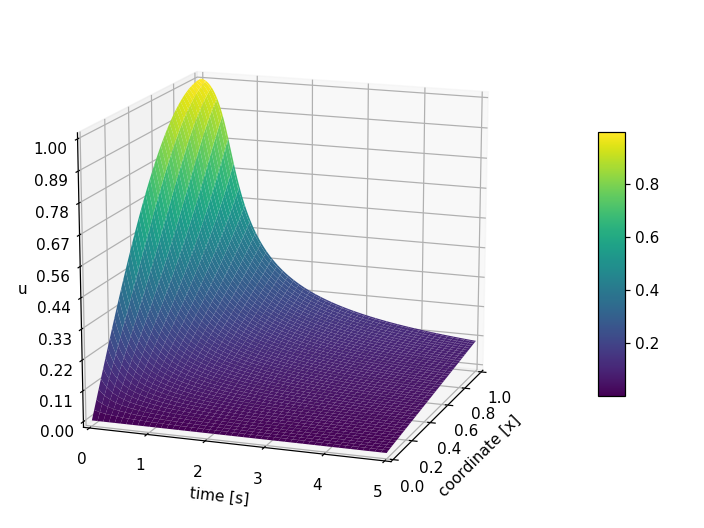

Text(0.5,0,'u')

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
N = 100 #количество шагов по координате
J = 1000 #по времени
xmax = 1
tmax = 5 # макс. координата и время
eps=0.0001 #задаем точность
y=np.zeros((J,N), dtype=float) #создаем массив с нашими численным значениями
setka_x = np.linspace (0, xmax, N, retstep=True) 
setka_t = np.linspace (0, tmax, J, retstep=True) # создаем равномерные сетки по координатам и времени (нужный шаг вычисляется автоматически)
x=setka_x[0]
h=setka_x[1]
t=setka_t[0]
tau=setka_t[1] #создаем массивы значений переменных и узнаем величину шага по каждой из них
y[0, :] = np.sin(np.pi*x/2)
y[:,0] = 0 #заполняем массив значений сеточной функции начальными и граничными условиями
#напишем функции для разностных операторов и коэффициентов уравнения
print(y)
def FDx(a,b):
    return (-np.exp(-y[a,b]**2)+np.exp(-y[a,b-1]**2))/h
def eq(a,b):
    return ((-1)*(FDx(a,b))*tau+y[a,b])
for i in range(1, N):
    for z in range (1, J):
        y[z,i]= eq(z-1,i)
#for i in range(1, 3):
#    for z in range (1, 3):
#        print(FDx(i,z))
print(y[5,:])
x, t = np.meshgrid(x, t)
fig = plt.figure()
ax = Axes3D(fig)
surf=ax.plot_surface(x, t, y, cmap=cm.viridis)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlim(xmax, 0)
ax.set_ylim(0, tmax)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('сооrdinate [x]')
ax.set_ylabel('time [s]')
ax.set_zlabel('u')